<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/RandomNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Números aleatorios y distribuciones de probabilidad

## Generador por congruencia lineal (LCG)

Construyo mi propio generador por congruencia lineal siguiendo el modelo:

$$x_{i+1} = (ax_i + c) \mod m$$

Donde $a=106$, $c=1283$ y $m=6075$.


Primero importamos algunas librerías de Python.

In [ ]:
%pip install skidmarks
import random
import numpy as np
from skidmarks import wald_wolfowitz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Ahora sí construimos la función generadora con los parámetros mencionados.

In [2]:
# Natural -> Real
# produce un número pseudoaleatorio usando el
#   generador por congruencia lineal prototípico
#   x_{i+1} = (ax_i + c) \mod m
def lcg(seed=1, a=106, c=1283, m=6075):
    x = seed
    while True:
        x = (a*x + c)%m
        yield x/m

Inicializamos nuestro generador "a" y generamos a partir de él 12,000 números pseudoaleatorios. Observamos que la secuancia pasa el runstest de aleatoriedad.

In [3]:
a = lcg()
rand1D = np.zeros([12000,1])
for i in range(12000):
    rand1D[i] = next(a)

print("RunsTest:", "Passed" if not wald_wolfowitz(rand1D)['p'] < 0.05
      else "Not Passed")

RunsTest: Passed


Sin embargo, al explorar la secuencia de manera gráfica observamos que existe un patrón muy definido.

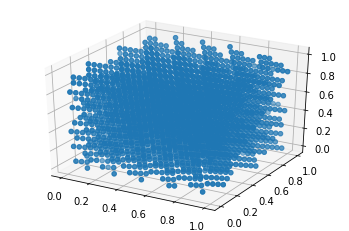

In [5]:
# Preparar para graficar en 3D
b = lcg(2020)
rand3D = np.zeros([4000,3])
for i in range(4000):
    rand3D[i, 0] = next(b)
    rand3D[i, 1] = next(b)
    rand3D[i, 2] = next(b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rand3D[:,0], rand3D[:,1], rand3D[:,2])
plt.show()

Esto significa que nuestro generador de números pseudoaleatorios no es muy robusto.

## Mersenne Twister

Ahora comparo el generador anterior con el generador por default de Python que es una implementación de Mersenne Twister, un algoritmo bastante robusto para la generación de números pseudoaleatorios.

In [6]:
random.seed(2020)
rand1D_mt = np.zeros([12000,1])
for i in range(12000):
    rand1D_mt[i] = random.random()
print("RunsTest:", "Passed" if not wald_wolfowitz(rand1D_mt)['p'] < 0.05
      else "Not Passed")

RunsTest: Passed


Vemos que también pasa el runstest. Pero como hemos visto antes, no podemos confiarnos únicamente de esta métrica.

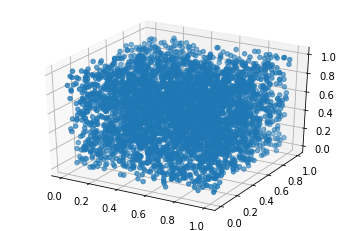

In [7]:
random.seed(2020)
rand3D_mt = np.zeros([4000,3])
for i in range(4000):
    rand3D_mt[i, 0] = random.random()
    rand3D_mt[i, 1] = random.random()
    rand3D_mt[i, 2] = random.random()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(rand3D_mt[:,0], rand3D_mt[:,1], rand3D_mt[:,2])
plt.show()

Finalmente, observamos en la gráfica 3D que no existe un patrón aparente que pruebe que la secuencia generada por el Mersenne Twister no sea aleatoria.

## Generador exponencial

En este apartado defino una función que mapea la distribución uniforme de números aleatorios que produce `random.random()` a una distrubución exponencial de números aleatorios entre 0 y 1.

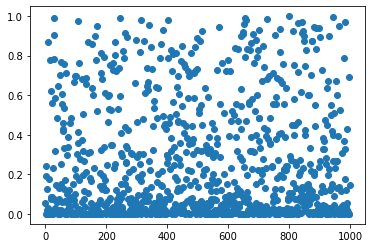

In [19]:
def exp_noice(μ=3):
    return np.exp(μ*np.log(1-random.random()))

rand1D_exp = np.zeros([12000, 1])
for i in range(12000):
    rand1D_exp[i] = exp_noice()

plt.scatter(np.arange(1000), rand1D_exp[:1000])
plt.show()

Así se ve el histograma del mapa de puntos anterior.

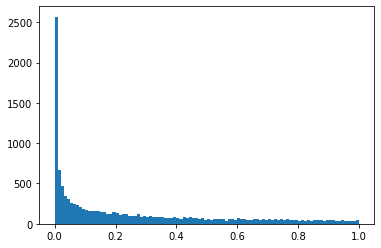

In [20]:
plt.hist(rand1D_exp,bins=100)
plt.show()

## Generador normal

Para el generador lineal utilizo el método de Box Muller para mapear la distribución uniforme de `random.random()` a una distrubución normal con media $\mu=0$ y $\sigma=0.3$.

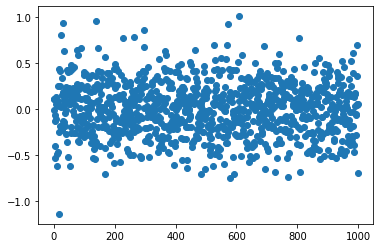

In [16]:
def gaussian_noice(mu=0, sigma=0.3):
    u1 = random.random()
    u2 = random.random()
    box_muller1 = np.sqrt(-2*np.log(u1))*np.cos(np.pi*u2) 
    #box_muller2 = np.sqrt(-2*np.log(u1))*np.sin(np.pi*u2) 
    return box_muller1*sigma + mu

rand1D_gauss = np.zeros([12000, 1])

for i in range(12000):
    rand1D_gauss[i] = gaussian_noice()

plt.scatter(np.arange(1000), rand1D_gauss[:1000])
plt.show()

Así se ve el histograma del mapa de puntos anterior.

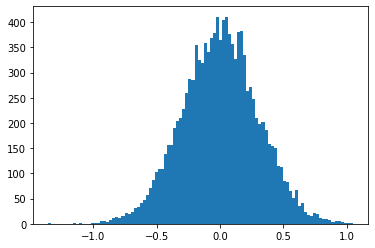

In [17]:
plt.hist(rand1D_gauss,bins=100)
plt.show()